In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
import os
import glob
cd=os.getcwd()
trainfiles = os.listdir('random_split/train')

In [0]:
import os
import glob
cd=os.getcwd()
trainfiles = os.listdir('random_split/train')

In [0]:
dataframetrainsample1.to_csv('dataframetrainsample1.csv')
dataframetestsample1.to_csv('dataframetestsample1.csv')
dataframecvsample1.to_csv('dataframecvsample1.csv')

In [0]:
testfiles = os.listdir('random_split/test')
cvfiles = os.listdir('random_split/dev')
testdata=pd.DataFrame()
cvdata=pd.DataFrame()
testdataframe=pd.DataFrame()
cvdataframe=pd.DataFrame()
for f in testfiles:
    a='random_split/test/'
    testdata=pd.read_csv(a+f)
    testdataframe=testdataframe.append(testdata)
for f in cvfiles:
    a='random_split/dev/'
    cvdata=pd.read_csv(a+f)
    cvdataframe=cvdataframe.append(cvdata)

In [0]:
traindataframe1=traindataframe.sample(frac=0.1)
testdataframe1=testdataframe.sample(frac=0.15)
cvdataframe1=cvdataframe.sample(frac=0.15)
print(traindataframe1.shape)
print(testdataframe1.shape)
print(cvdataframe1.shape)

In [0]:
traindatframe1.to_csv('traindataframe1.csv')
testdatframe1.to_csv('testdataframe1.csv')
cvdatframe1.to_csv('cvdataframe1.csv')


In [1]:
import pandas as  pd
traindataframe=pd.read_csv('traindataframe1.csv',nrows=82339)
testdataframe=pd.read_csv('testdataframe1.csv',nrows=20585)
cvdataframe=pd.read_csv('cvdataframe1.csv',nrows=20585)

In [3]:
totaldataframe=pd.concat([traindataframe,testdataframe,cvdataframe],axis=0)

In [0]:
totaldataframe=totaldataframe.dropna()

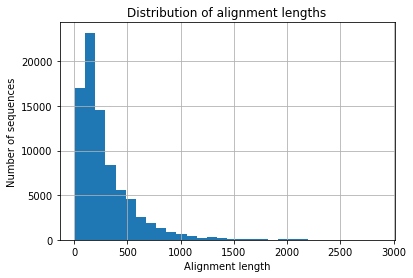

In [0]:
fd=pd.DataFrame()
import matplotlib.pyplot as plt
fd['alignment_length'] = traindataframe.aligned_sequence.str.len()
fd.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

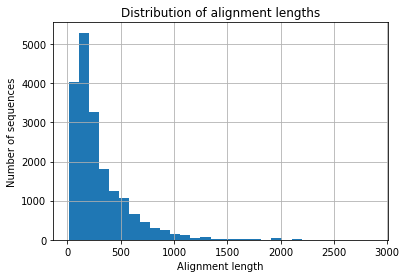

In [0]:
fd1=pd.DataFrame()
fd1['alignment_length'] = testdataframe.aligned_sequence.str.len()
fd1.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

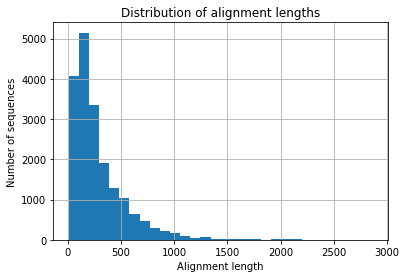

In [0]:
fd2=pd.DataFrame()
fd2['alignment_length'] = cvdataframe.aligned_sequence.str.len()
fd2.alignment_length.hist(bins=30)
plt.title('Distribution of alignment lengths')
plt.xlabel('Alignment length')
plt.ylabel('Number of sequences')

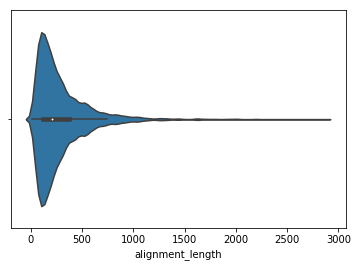

In [0]:
import seaborn as sns
sns.violinplot(fd['alignment_length'])

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect1=CountVectorizer()
out1=vect1.fit_transform(totaldataframe['family_id'])
features1=vect1.get_feature_names()
counts1=out1.sum(axis=0)
print('number of unique families are',len(features1))

number of unique families are 13562


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
out=vect.fit_transform(totaldataframe['family_accession'])

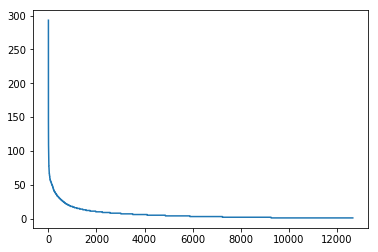

In [0]:
traincount=traindataframe1['family_accession'].value_counts()
plt.plot(traincount.values)

In [0]:
lengthofsequence=traindataframe['sequence'].apply(lambda x: len(x))

In [0]:
print(lengthofsequence.values)

[169  86  46 ...  65  90  57]


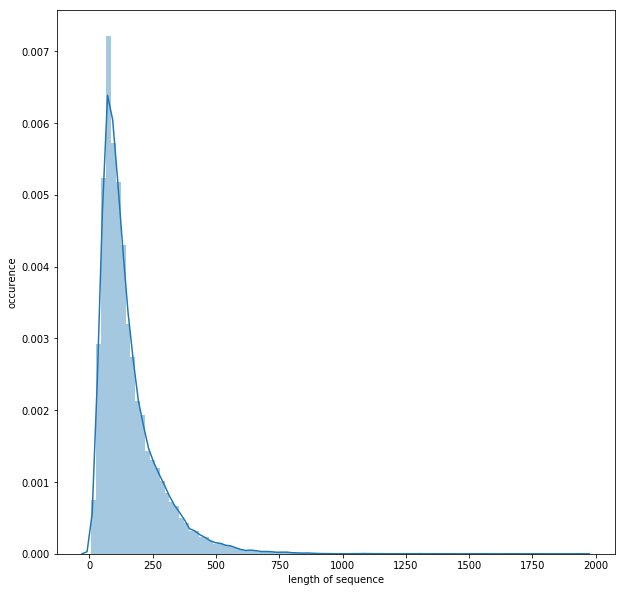

In [0]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.distplot(lengthofsequence.values,hist=True,bins=100)
plt.xlabel('length of sequence')
plt.ylabel('occurence')

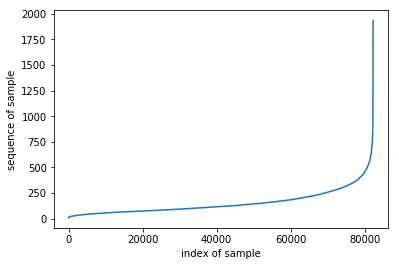

In [0]:
plt.plot(sorted(lengthofsequence))
plt.xlabel('index of sample')
plt.ylabel('sequence of sample')
plt.show()

In [14]:
import string
from scipy.sparse import csr_matrix

def string_vectorizer(strng, alphabet=string.ascii_lowercase):
    
    vector = [[0 if char != letter else 1 for char in alphabet] 
                  for letter in strng]
    vector1=np.array(vector)
    shapeout=vector1.shape[0]
    
    diff=200-shapeout
    reshapearray=np.zeros((diff,26),dtype=int)
    finalarray=np.vstack((vector,reshapearray))
    
    return finalarray

    
    

In [25]:
trainarray1=np.zeros((200,26),dtype=int)
import numpy as np
for sen in traindataframe['sequence'][:1]:
    trainarray1=np.vstack((trainarray1,string_vectorizer(sen.lower())))
    break
    trainarray1.append(string_vectorizer(sen.lower()))

In [26]:
trainarray1=trainarray1.reshape(2,200,26)

In [27]:
print(trainarray1.shape)

(2, 200, 26)


In [0]:
testarray1=[]
for sen in testdataframe['sequence']:
    testarray1.append(string_vectorizer(sen.lower()))

    

In [0]:
cvarray1=[]
for sen in cvdataframe['sequence']:
    cvarray1.append(string_vectorizer(sen.lower()))
       

In [0]:
trainarray1=np.array(trainarray1).reshape(82339,200,26)
testarray1=np.array(testarray1).reshape(20585,200,26)
cvarray1=np.array(cvarray1).reshape(20585,200,26)

In [0]:
totaldataframe=pd.concat([traindataframe,testdataframe,cvdataframe],axis=0)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
out=vect.fit_transform(totaldataframe['family_accession'])
features=vect.get_feature_names()
counts=out.sum(axis=0)
print('number of unique class lables are',len(features))

number of unique class lables are 11088


In [0]:
from keras.models import Sequential
from keras.layers import Flatten,Activation,Dense,Dropout
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from sklearn.preprocessing import LabelEncoder
label1=LabelEncoder()
label1.fit(totaldataframe['family_accession'])
trainy=label1.transform(traindataframe['family_accession'])
testy=label1.transform(testdataframe['family_accession'])
cvy=label1.transform(cvdataframe['family_accession'])

In [0]:
import warnings
warnings.filterwarnings('ignore')
import keras as keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras import backend as K
model=Sequential()
model.add(Conv1D(100,kernel_size=3,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.8))
model.add(Conv1D(250,5,activation='relu'))
model.add(Dropout(0.8))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11088,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=32,validation_data=[cvarray1,cvy],batch_size=256) 


W0615 06:47:32.183815 139819371116416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0615 06:47:32.205783 139819371116416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 06:47:32.208221 139819371116416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0615 06:47:32.331921 139819371116416 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0615 06:47:32.339305 139819371116416 deprecation_wrapp

Train on 82339 samples, validate on 20585 samples
Epoch 1/32
82339/82339 [==============================] - 131s 2ms/step - loss: 8.4683 - acc: 0.0152 - val_loss: 7.5435 - val_acc: 0.0344
Epoch 2/32
82339/82339 [==============================] - 126s 2ms/step - loss: 7.1752 - acc: 0.0414 - val_loss: 6.5979 - val_acc: 0.1192
Epoch 3/32
82339/82339 [==============================] - 129s 2ms/step - loss: 6.4478 - acc: 0.0975 - val_loss: 5.5503 - val_acc: 0.2636
Epoch 4/32
82339/82339 [==============================] - 130s 2ms/step - loss: 5.6855 - acc: 0.1714 - val_loss: 4.6855 - val_acc: 0.3760
Epoch 5/32
82339/82339 [==============================] - 130s 2ms/step - loss: 5.0147 - acc: 0.2364 - val_loss: 4.0179 - val_acc: 0.4637
Epoch 6/32
82339/82339 [==============================] - 130s 2ms/step - loss: 4.4909 - acc: 0.2884 - val_loss: 3.5514 - val_acc: 0.5165
Epoch 7/32
82339/82339 [==============================] - 130s 2ms/step - loss: 4.0575 - acc: 0.3286 - val_loss: 3.2024 - 

In [0]:
# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

Accuracy: 74.91%


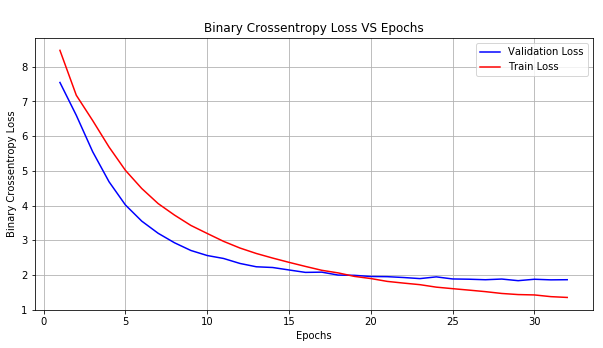

In [0]:
# Final evaluation of the model
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,33))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras import backend as K
model=Sequential()
model.add(Conv1D(100,kernel_size=8,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))
model.add(Conv1D(250,10,activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11088,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=20,validation_data=[cvarray1,cvy],batch_size=128) 


Train on 82339 samples, validate on 20585 samples
Epoch 1/20
82339/82339 [==============================] - 132s 2ms/step - loss: 7.5548 - acc: 0.0403 - val_loss: 6.2192 - val_acc: 0.1495
Epoch 2/20
82339/82339 [==============================] - 129s 2ms/step - loss: 5.5663 - acc: 0.1953 - val_loss: 4.1309 - val_acc: 0.4240
Epoch 3/20
82339/82339 [==============================] - 129s 2ms/step - loss: 3.9086 - acc: 0.3684 - val_loss: 2.9703 - val_acc: 0.5781
Epoch 4/20
82339/82339 [==============================] - 129s 2ms/step - loss: 2.8258 - acc: 0.4960 - val_loss: 2.3325 - val_acc: 0.6626
Epoch 5/20
82339/82339 [==============================] - 129s 2ms/step - loss: 2.1027 - acc: 0.5883 - val_loss: 1.9890 - val_acc: 0.7134
Epoch 6/20
82339/82339 [==============================] - 129s 2ms/step - loss: 1.6278 - acc: 0.6584 - val_loss: 1.8100 - val_acc: 0.7431
Epoch 7/20
82339/82339 [==============================] - 129s 2ms/step - loss: 1.3082 - acc: 0.7144 - val_loss: 1.7149 - 

In [0]:
# this function is used draw Binary Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Binary Crossentropy Loss')
  plt.title('\nBinary Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

Accuracy: 80.95%


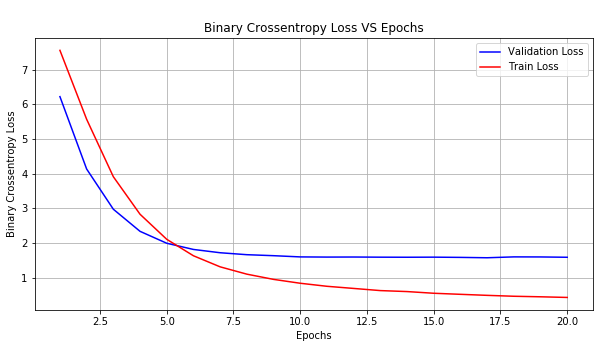

In [0]:
# Final evaluation of the model
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,21))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras import backend as K
model=Sequential()
model.add(Conv1D(100,kernel_size=10,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(350,20,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.6))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(11088,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=25,validation_data=[cvarray1,cvy],batch_size=128) 


Train on 82339 samples, validate on 20585 samples
Epoch 1/25
82339/82339 [==============================] - 76s 927us/step - loss: 7.4882 - acc: 0.0319 - val_loss: 6.4002 - val_acc: 0.1064
Epoch 2/25
82339/82339 [==============================] - 73s 889us/step - loss: 5.7966 - acc: 0.1581 - val_loss: 4.5711 - val_acc: 0.3421
Epoch 3/25
82339/82339 [==============================] - 73s 886us/step - loss: 4.3160 - acc: 0.3068 - val_loss: 3.4132 - val_acc: 0.5001
Epoch 4/25
82339/82339 [==============================] - 73s 886us/step - loss: 3.2847 - acc: 0.4234 - val_loss: 2.6477 - val_acc: 0.6110
Epoch 5/25
82339/82339 [==============================] - 73s 885us/step - loss: 2.5348 - acc: 0.5196 - val_loss: 2.1891 - val_acc: 0.6787
Epoch 6/25
82339/82339 [==============================] - 73s 885us/step - loss: 2.0159 - acc: 0.5922 - val_loss: 1.9382 - val_acc: 0.7155
Epoch 7/25
82339/82339 [==============================] - 73s 886us/step - loss: 1.6452 - acc: 0.6485 - val_loss: 1.

Accuracy: 81.76%


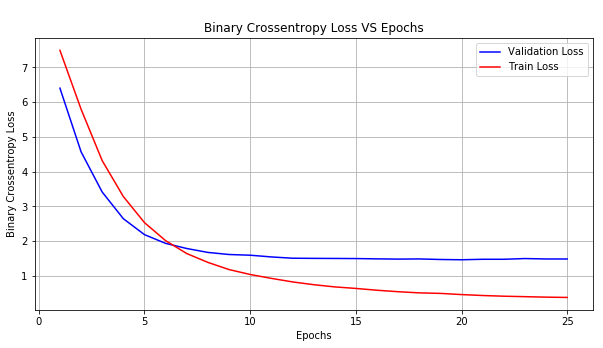

In [0]:
# Final evaluation of the model
import matplotlib.pyplot as plt
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,26))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D
from keras import backend as K
model=Sequential()
model.add(Conv1D(100,kernel_size=8,activation='relu',input_shape=(200,26)))
model.add(MaxPooling1D(pool_size=3))
model.add(Dropout(0.3))
model.add(Conv1D(250,10,activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(300,10,activation='relu'))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(11088,activation='softmax'))
model.compile(loss=keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
history=model.fit(trainarray1,trainy,epochs=60,validation_data=[cvarray1,cvy],batch_size=64) 


Train on 82339 samples, validate on 20585 samples
Epoch 1/60
82339/82339 [==============================] - 22s 262us/step - loss: 7.2293 - acc: 0.0835 - val_loss: 5.4568 - val_acc: 0.2360
Epoch 2/60
82339/82339 [==============================] - 20s 238us/step - loss: 4.1210 - acc: 0.3625 - val_loss: 3.1975 - val_acc: 0.5199
Epoch 3/60
82339/82339 [==============================] - 20s 238us/step - loss: 2.2873 - acc: 0.5761 - val_loss: 2.3248 - val_acc: 0.6315
Epoch 4/60
82339/82339 [==============================] - 20s 239us/step - loss: 1.3546 - acc: 0.7105 - val_loss: 1.9961 - val_acc: 0.6838
Epoch 5/60
82339/82339 [==============================] - 20s 239us/step - loss: 0.8884 - acc: 0.7897 - val_loss: 1.8413 - val_acc: 0.7125
Epoch 6/60
82339/82339 [==============================] - 20s 239us/step - loss: 0.6510 - acc: 0.8378 - val_loss: 1.8270 - val_acc: 0.7207
Epoch 7/60
82339/82339 [==============================] - 20s 241us/step - loss: 0.5167 - acc: 0.8659 - val_loss: 1.

Accuracy: 79.36%


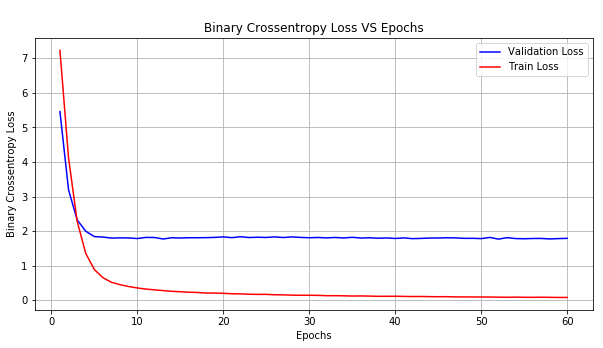

In [0]:
scores = model.evaluate(testarray1,testy, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Test and train accuracy of the model
model_3_test = scores[1]
model_3_train = max(history.history['acc'])

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,61))

# Validation loss
vy = history.history['val_loss']
# Training loss
ty = history.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

In [3]:
import pandas as pd
s=[['(100,250)','(0.8,0.8)','32','yes','0.68','0.75','0.75'],['(100,250)','(0.6,0.6)','20','yes','0.88','0.81','0.80'],['(100,350)','(0.5,0.6)','25','yes','0.89','0.82','0.82'],['(100,250,300)','(0.3,0.2,0.2)','60','no','0.97','0.79','0.79']]

x=pd.DataFrame(s,columns=['configuration','dropout','number of epochs','batch noramlization','training accuracy','validation accuracy','test accuracy'])
x

,configuration,dropout,number of epochs,batch noramlization,training accuracy,validation accuracy,test accuracy
0,"(100,250)","(0.8,0.8)",32,yes,0.68,0.75,0.75
1,"(100,250)","(0.6,0.6)",20,yes,0.88,0.81,0.80
2,"(100,350)","(0.5,0.6)",25,yes,0.89,0.82,0.82
3,"(100,250,300)","(0.3,0.2,0.2)",60,no,0.97,0.79,0.79


# OBSERVATIONS DOCUMENTATION AND KEYTAKEAWAYS.



#### IN PFAM RANDOM SPLIT CASE STUDY WE ARE GIVEN WITH SEQUENCE AND WE HAVE TO PREDICT THE FMILY OF THE PROTEIN. WE HAVE TO PREDICT THE FAMILY PROTEIN.
#### WE HAVE THE INPUT FEATURES TO OUR MODEL .AMINO ACID IS THE SEQUENCE FOR THIS DOMAIN.

#### Description of fields: - sequence: These are usually the input features to your model. Amino acid sequence for this domain. There are 20 very common amino acids (frequency > 1,000,000), and 4 amino acids that are quite uncommon: X, U, B, O, Z. - family_accession: These are usually the labels for your model. Accession number in form PFxxxxx.y (Pfam), where xxxxx is the family accession, and y is the version number.


#### WE HAVE DATA FOR TRAINING ,CROSS VALIDATION AND TESTING SEPERATELY. WE HAVE DONE EXPLORATORY DATA ANALTYSIS FOR DATA. WE HAVE 1100 CLASS LABELS WHICH ARE VERY FREQUENT.


#### OBSERVATIONS ARE FEW FAMILY ACCESSIONS ARE SIMILAR
##### FROM THE EXPLOARTORY DATA ANLYSIS HISTOGRAM PLOTS OF WE HAVE VISUALISED SEQUENCE LENGTH THE TRAIN DATA , TEST DATA AND CROSS VALIDATION DATA.
#### WE HAVE VISUALISED THE BOXPLOT AND VIOLIN PLOT FOR THE ALIGNMENT LENGTH.

#### WE HAVE PLOTTED THE PROBABILITY DENSITY FUNCTION AND CONSIDERD THE LENGTH OF SEQUENCE.WE HAVE CONSIDERD THE LENGTH OF 200 DUE TO LACK OF COMPUTATIONAL POWER. WE HAVE ALSO PLOTTED THE LENGTH OF SEQUENCE.

#### WE HAVE ENCODED EVERY LETTER OF SEQUENCE INTO LENGTH OF 26. WE HAVE OBTAINED THE SEQUENCE PATTERN AND DETERMINED THE CLASS LABEL.

#### THERE ARE FEW KEY TAKE AWAYS 
* SEQUEENCE LENGTH IS ALMOST SIMILAR FOR THE PARTICULAR CLASS LABEL.
* THE SEQUENCE OF THE PROTEIN FOLLOW A PATTERN.

#### WE WILL TRAINED THE MODEL USING THE CONVOLUTIONAL NERAL NETWORS  FROM THE FEATURES WE EXTRACT TO PREDICT THE CLASSLABEL.

#### OBSERVATIONS AFTER PERFORMING FEATURE EXTRACTION:-
** UNIQUE CLASS LABELS HAVE UNIQUE LENGTH OF SEQUENCE

** THE SEQUENCE WHICH ARE REPRESENTED BY THE UNDEFINED DOTS THEIR INDICES ARE ALMOST SIMILAR FOR THAT PARTICULAR CLASSLABEL.

#### THERE ARE VARIOUS RESEARCH PAPERS,BLOGS,YOUTUBE VIDEOS WHICH DESCRIBE THE REALTION OF PROTEIN SEQUENCES..

#### ALL THE ANLAYSIS WE HAVE DONE IS PART OF PROTEIN SEQUENCING TO PREDICT WHETHER THAT PROTEIN SEQUENCE BELONGS TO PARTICULAR FAMILY OR NOT.

#### WE HAVE USED VARIOUS CONFIGURATIONS WE HAVE OBTAINED THE MAXIMUM ACCURACY OF  PERCENT.


#### WE HAVE USED RELU AS THE ACTIVATION FUNCTION FOR THE INPUT AND HIDDEN LAYERS AND SOFTMAX AS THE ACTIVATION FUNCTION TO PREDICT FOR THE OUTPUT LAYER BASED ON PROBABILTY.

#### WE CONSIDERD ACCURACY AS THE METRIC. WE HAVE PLOTTED THE GRAPHS FOR THE TRAINLOSS AND CROSS VALIDATION LOSS TO SEE THE HOW MODEL IS PERFORMING AND WHETHER THE MODEL IS OVERFITTING OR UNDERFITTING.

#### WE HAVE USED DROPUTS AND BATCH NORMALIZATION WHICH ARE USED TO PREVENT THE OVERFITTING OF THE MODEL.

#### USING THE DROPOUT LAYER WE CAN SWITCH OFF THE CELLS OF LAYER BASED ON THE PROBABILITY GIVEN.

#### WE HAVE OBTAINED 90PERCENT ACCURACY ON TEST DATA UISNG THE CONFIGURATION OF (100,250) WITH DROPOUT AND BATCH NORMALIZATION. WE USE BATCH NORMALIZATION BECAUSE WE APPLY THE FUNCTIONS ON THE MODELS SUCH AS RELU. WE PERFROM THE BATCH NORMALIZATION SO THAT THE INPUT DOES NOT LOSS ITS ORIINAL BEAHVIOR.